In [39]:
from matplotlib.pyplot import subplots
from numpy import where
from pandas import read_csv, cut, concat
from seaborn import set_style, barplot, histplot, boxplot

In [2]:
set_style('darkgrid')

In [3]:
column_types = {
    'fraDPALevel': str,
    'spaTest': str,
    'spaTestStatus': str,
    'spaBall100': str,
    'spaDPALevel': str,
    'spaPTName': str,
    'spaPTRegName': str,
    'spaPTAreaName': str,
    'spaPTTerName': str
}

In [4]:
column_renamings = {'HistLang': 'histLang'}

In [5]:
ife = (
    read_csv('data/Odata2019File.csv', sep=';', encoding='windows-1251', dtype=column_types)
    .rename(columns=column_renamings)
)

In [6]:
ife.info(verbose=True, show_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 353813 entries, 0 to 353812
Data columns (total 126 columns):
 #    Column            Non-Null Count   Dtype  
---   ------            --------------   -----  
 0    OUTID             353813 non-null  object 
 1    Birth             353813 non-null  int64  
 2    SEXTYPENAME       353813 non-null  object 
 3    REGNAME           353813 non-null  object 
 4    AREANAME          353813 non-null  object 
 5    TERNAME           353813 non-null  object 
 6    REGTYPENAME       353813 non-null  object 
 7    TerTypeName       353813 non-null  object 
 8    ClassProfileNAME  319688 non-null  object 
 9    ClassLangName     319688 non-null  object 
 10   EONAME            319688 non-null  object 
 11   EOTYPENAME        319688 non-null  object 
 12   EORegName         319688 non-null  object 
 13   EOAreaName        319688 non-null  object 
 14   EOTerName         319688 non-null  object 
 15   EOParent          319688 non-null  object 
 16   

In [7]:
ife.shape

(353813, 126)

In [8]:
ife['OUTID'].nunique()

353813

In [9]:
participants = ife[ife.columns[:16]].fillna('').set_index('OUTID')

In [10]:
participants.info()

<class 'pandas.core.frame.DataFrame'>
Index: 353813 entries, 07ad4c55-70ef-442d-bb7f-34c95c0e6ee4 to ae187ba1-7897-4855-8e01-f6fb4db2222b
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Birth             353813 non-null  int64 
 1   SEXTYPENAME       353813 non-null  object
 2   REGNAME           353813 non-null  object
 3   AREANAME          353813 non-null  object
 4   TERNAME           353813 non-null  object
 5   REGTYPENAME       353813 non-null  object
 6   TerTypeName       353813 non-null  object
 7   ClassProfileNAME  353813 non-null  object
 8   ClassLangName     353813 non-null  object
 9   EONAME            353813 non-null  object
 10  EOTYPENAME        353813 non-null  object
 11  EORegName         353813 non-null  object
 12  EOAreaName        353813 non-null  object
 13  EOTerName         353813 non-null  object
 14  EOParent          353813 non-null  object
dtypes: int64(1), object(14)
m

In [11]:
participants.head()

,Birth,SEXTYPENAME,REGNAME,AREANAME,TERNAME,REGTYPENAME,TerTypeName,ClassProfileNAME,ClassLangName,EONAME,EOTYPENAME,EORegName,EOAreaName,EOTerName,EOParent
OUTID,,,,,,,,,,,,,,,
07ad4c55-70ef-442d-bb7f-34c95c0e6ee4,2001,жіноча,Запорізька область,Василівський район,м.Василівка,Студент закладу вищої освіти,місто,Молодший спеціаліст,українська,"Відокремлений структурний підрозділ ""Василівсь...",заклад вищої освіти,Запорізька область,Василівський район,м.Василівка,Департамент освіти і науки Запорізької облдерж...
8626c448-3a7d-434f-b01a-c2530ccf3a4f,1985,жіноча,Донецька область,Донецька область,м.Торецьк,Учень (слухач) закладу професійної (професійно...,місто,Кваліфікований робітник,українська,Торецький професійний ліцей,професійний ліцей відповідного профілю,Донецька область,м.Торецьк,м.Торецьк,Департамент освіти і науки Донецької обласної ...
9709b00b-144c-4487-b7bc-66c0b353b324,2001,жіноча,Тернопільська область,Тернопільська область,м.Тернопіль,Студент закладу вищої освіти,місто,Молодший спеціаліст,українська,"Приватний вищий навчальний заклад ""Медичний ко...",заклад вищої освіти,Тернопільська область,м.Тернопіль,м.Тернопіль,Управління освіти і науки Тернопільської облас...
5617254e-aee4-4fa6-81cc-f0159cc972bc,2000,чоловіча,Рівненська область,Рівненська область,м.Вараш,Учень (слухач) закладу професійної (професійно...,місто,Кваліфікований робітник,українська,Професійно-технічне училище відокремленого під...,професійно-технічне училище відповідного профілю,Рівненська область,м.Вараш,м.Вараш,Управління освіти і науки Рівненської обласної...
2e8b9de3-8806-415a-bad1-be822ef8a042,2001,жіноча,Кіровоградська область,Добровеличківський район,м.Помічна,Випускник закладу загальної середньої освіти 2...,місто,Історичний,українська,Помічнянська загальноосвітня школа І-ІІІ ступе...,середня загальноосвітня школа,Кіровоградська область,Добровеличківський район,м.Помічна,Відділ освіти виконавчого комітету Помічнянськ...


In [12]:
age_bins = cut(2019 - participants['Birth'], [0, 17, 18, 21, 25, 35, 100]).rename('Age')

In [13]:
def make_age_label(interval):
    if interval.left in {0, interval.right - 1}:
        return str(interval.right)
    return f'{interval.left + 1}-{interval.right}'

In [14]:
default_color = '#1f77b4'

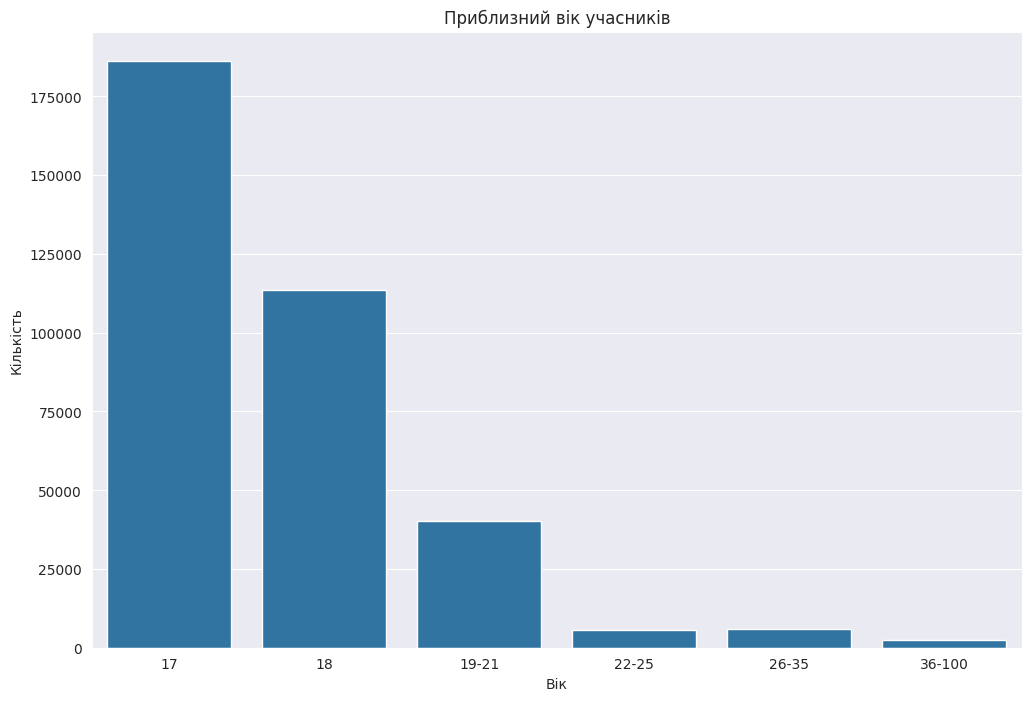

In [46]:
age_counts = age_bins.value_counts(sort=False)
axes = subplots(figsize=(12, 8))[1]
x = age_counts.index.map(make_age_label)
y = age_counts.values
barplot(x=x, y=y, ax=axes, color=default_color)
axes.set_xlabel('Вік')
axes.set_ylabel('Кількість')
axes.set_title('Приблизний вік учасників');

In [16]:
sex_palette = {'чоловіча': '#1f77b4', 'жіноча': '#ff7f0e'}

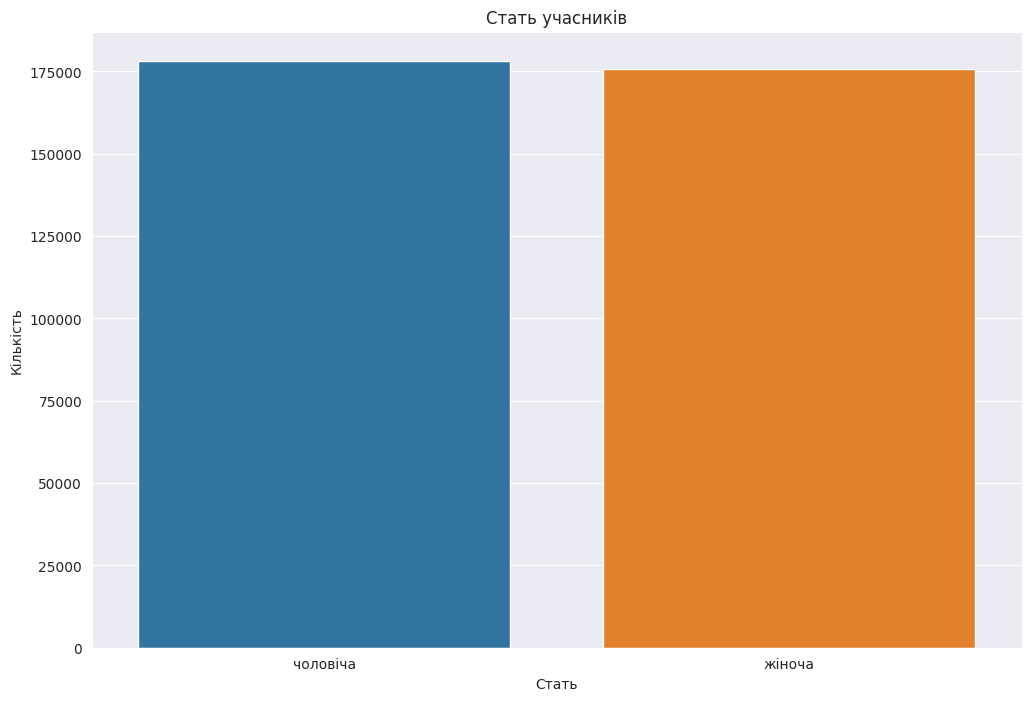

In [17]:
sex_counts = participants['SEXTYPENAME'].value_counts()
axes = subplots(figsize=(12, 8))[1]
barplot(x=sex_counts.index, y=sex_counts, ax=axes, palette=sex_palette)
axes.set_xlabel('Стать')
axes.set_ylabel('Кількість')
axes.set_title('Стать учасників');

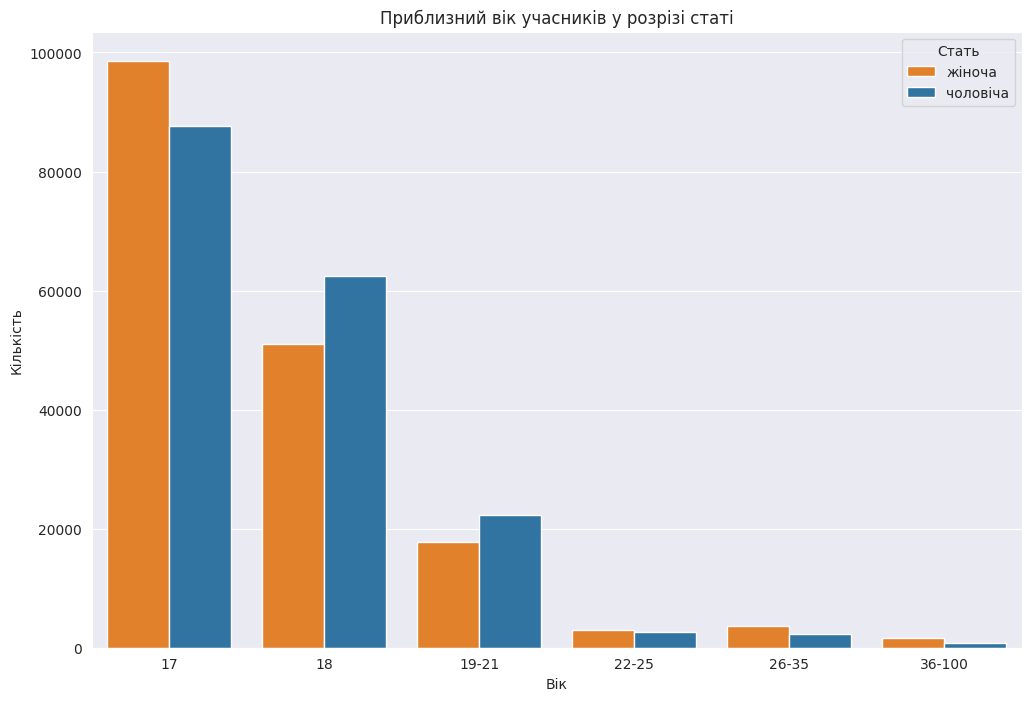

In [18]:
age_sex_counts = (
    concat([participants['SEXTYPENAME'], age_bins], axis=1)
    .groupby(['Age', 'SEXTYPENAME'])
    .size()
)
axes = subplots(figsize=(12, 8))[1]
x = age_sex_counts.index.get_level_values(0).map(make_age_label)
y = age_sex_counts.values
hue = age_sex_counts.index.get_level_values(1).rename('Стать')
barplot(x=x, y=y, hue=hue, ax=axes, palette=sex_palette)
axes.set_xlabel('Вік')
axes.set_ylabel('Кількість')
axes.set_title('Приблизний вік учасників у розрізі статі');

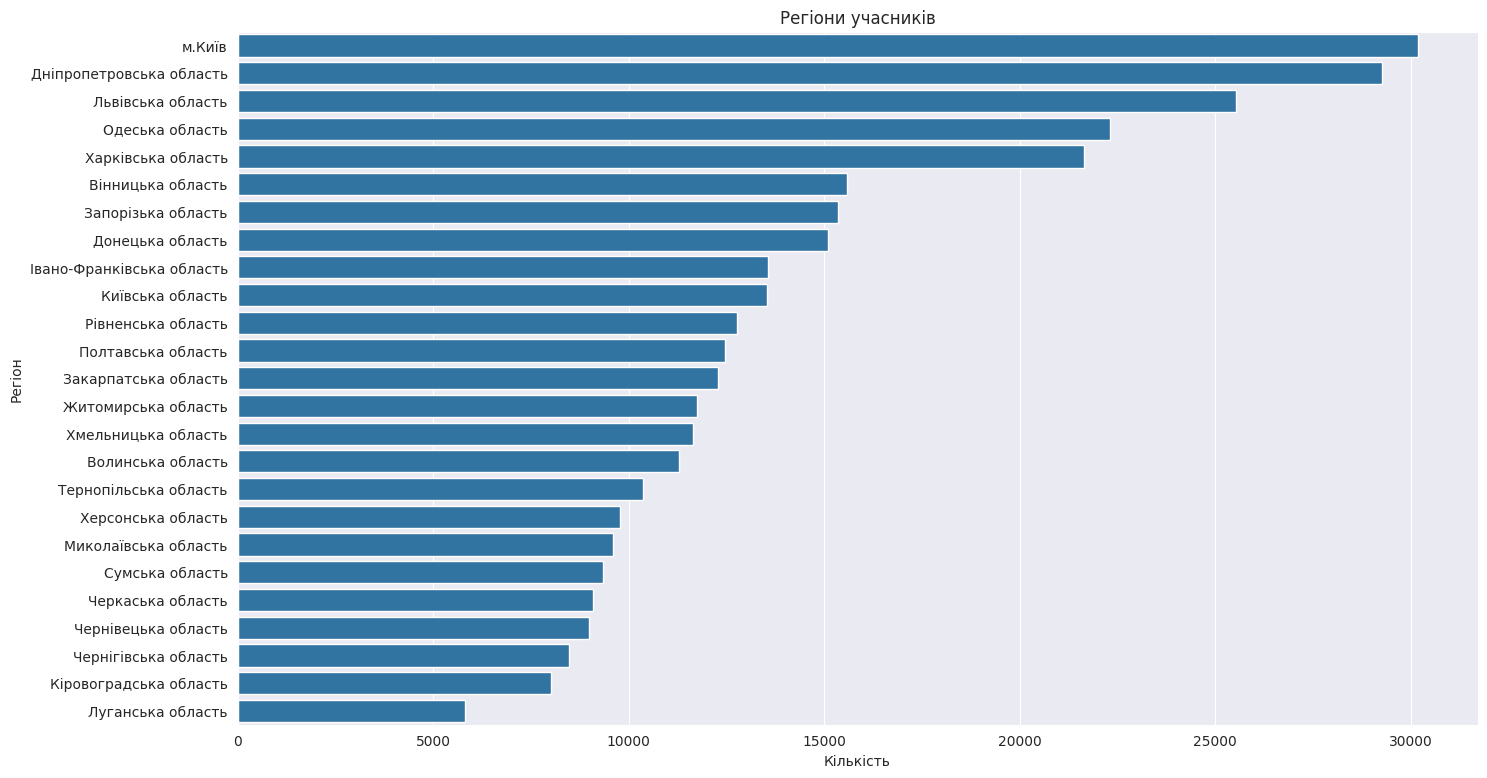

In [19]:
region_counts = participants['REGNAME'].value_counts()
axes = subplots(figsize=(16, 9))[1]
barplot(x=region_counts, y=region_counts.index, ax=axes, color=default_color)
axes.set_xlabel('Кількість')
axes.set_ylabel('Регіон')
axes.set_title('Регіони учасників');

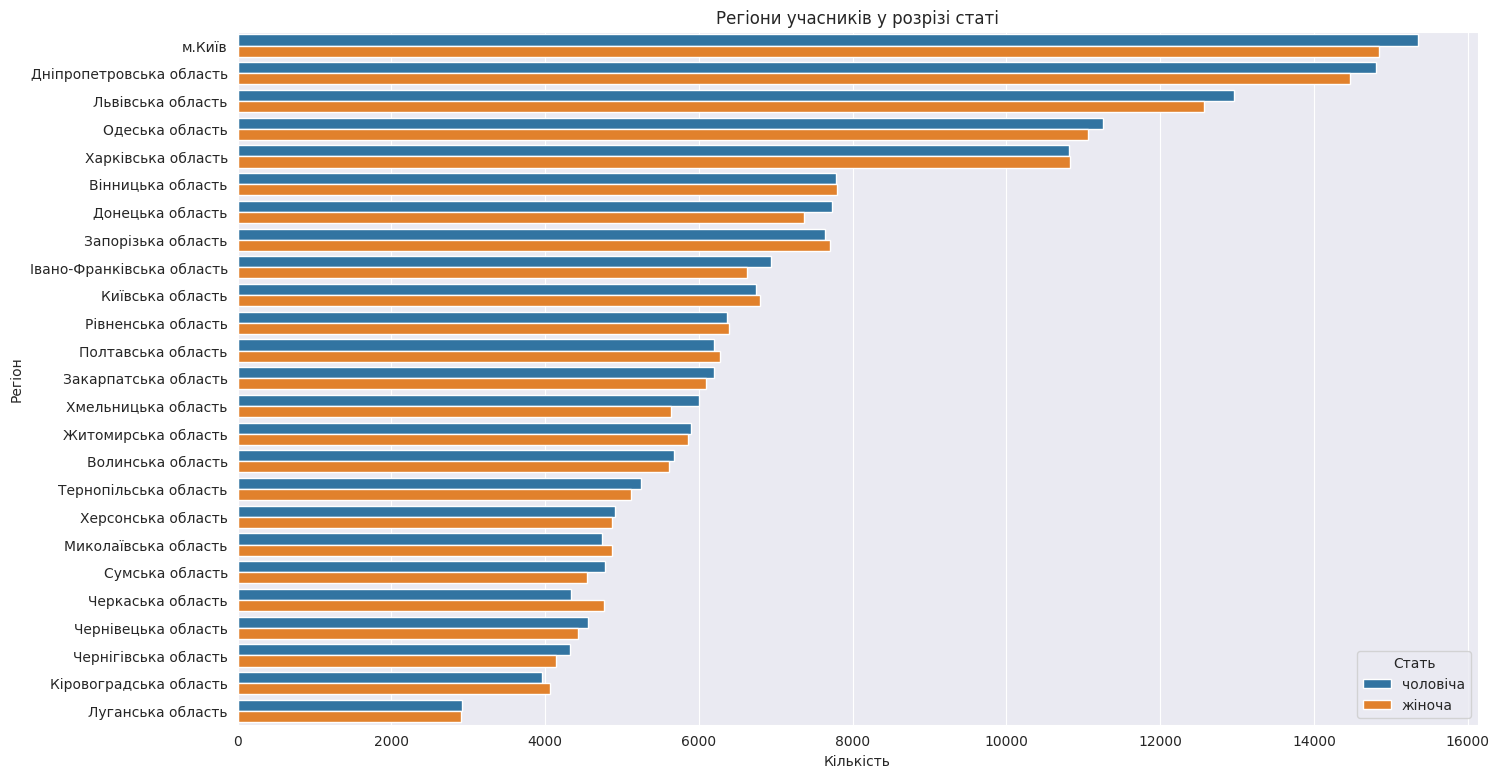

In [20]:
region_sex_counts = participants.groupby(['REGNAME', 'SEXTYPENAME']).size().sort_values(ascending=False)
axes = subplots(figsize=(16, 9))[1]
x = region_sex_counts.values
y = region_sex_counts.index.get_level_values(0)
hue = region_sex_counts.index.get_level_values(1).rename('Стать')
barplot(x=x, y=y, hue=hue, ax=axes, palette=sex_palette)
axes.set_xlabel('Кількість')
axes.set_ylabel('Регіон')
axes.set_title('Регіони учасників у розрізі статі');

In [21]:
def break_caption(caption, n_tokens=3):
    tokens = caption.split()
    output = ' '.join(tokens[:n_tokens])
    for i in range(n_tokens, len(tokens), n_tokens):
        output += '\n' + ' '.join(tokens[i:i + n_tokens])
    return output

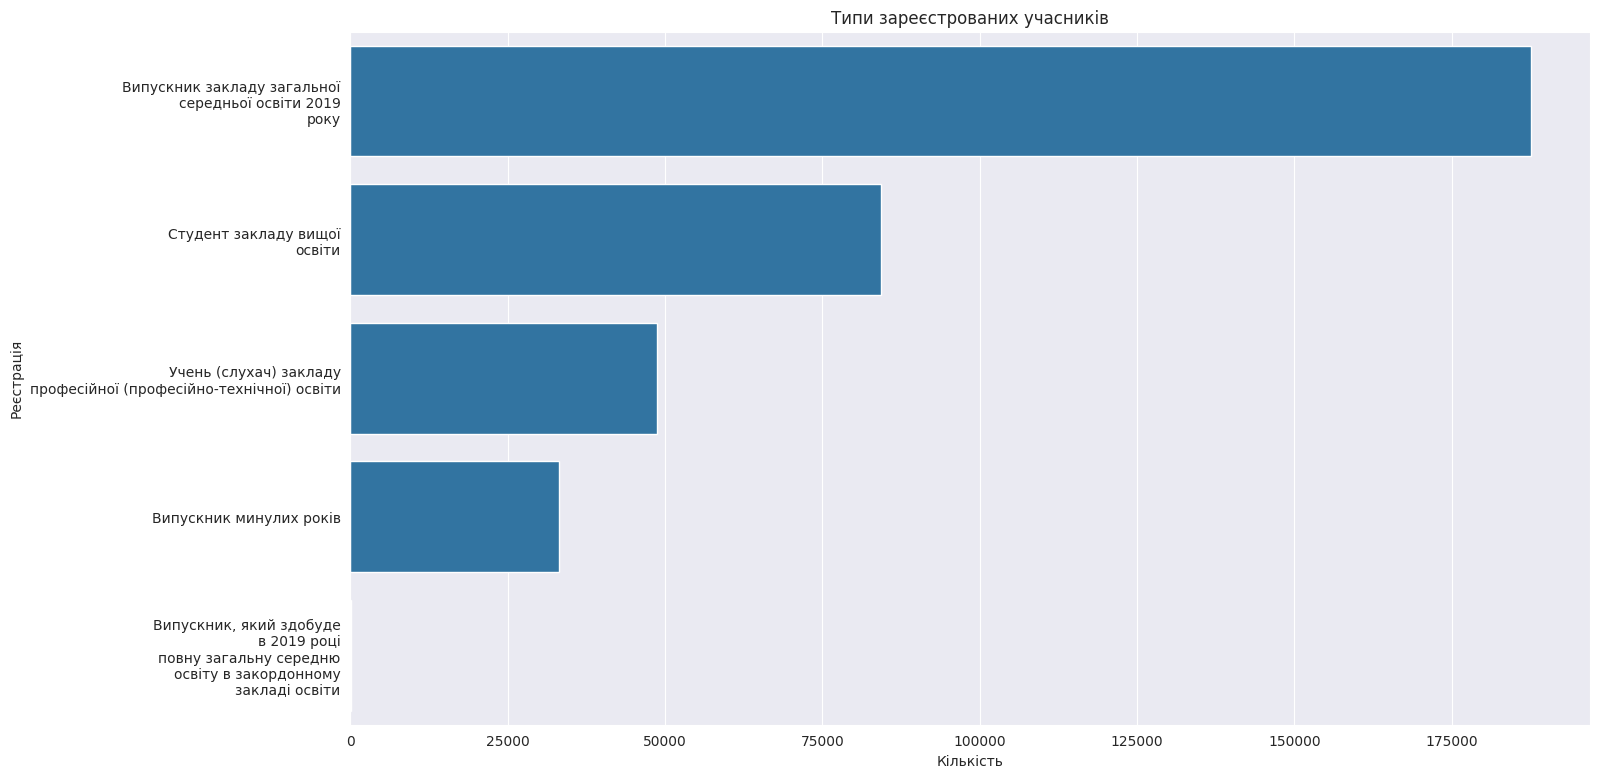

In [22]:
registration_counts = participants['REGTYPENAME'].value_counts()
axes = subplots(figsize=(16, 9))[1]
x = registration_counts.values
y = registration_counts.index.map(break_caption)
barplot(x=x, y=y, ax=axes, color=default_color)
axes.set_xlabel('Кількість')
axes.set_ylabel('Реєстрація')
axes.set_title('Типи зареєстрованих учасників');

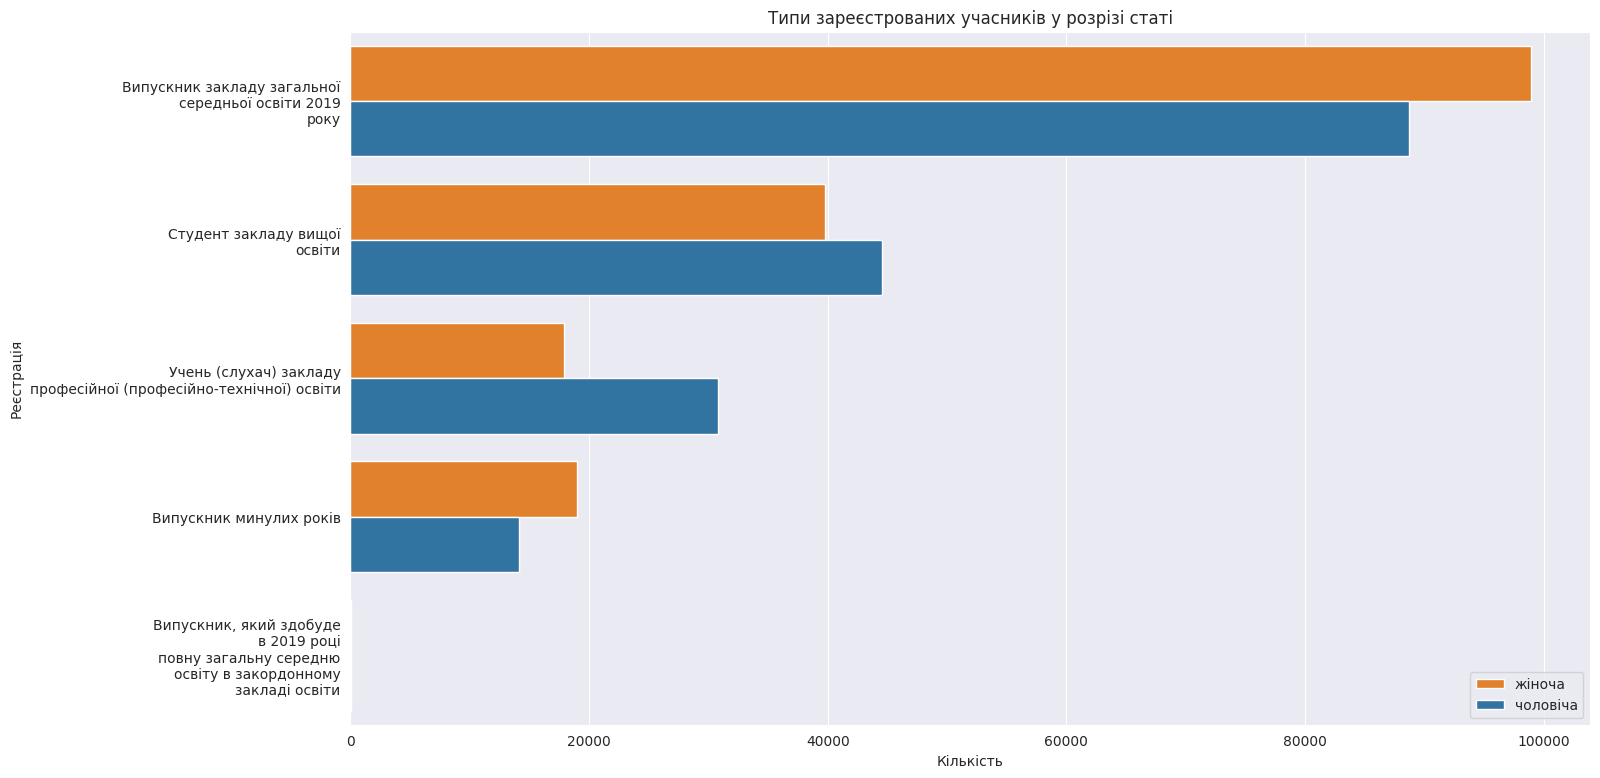

In [23]:
registration_sex_counts = (
    participants
    .groupby(['REGTYPENAME', 'SEXTYPENAME'])
    .size()
    .sort_values(ascending=False)
)
axes = subplots(figsize=(16, 9))[1]
x = registration_sex_counts.values
y = registration_sex_counts.index.get_level_values(0).map(break_caption)
hue = registration_sex_counts.index.get_level_values(1).rename('Стать')
barplot(x=x, y=y, hue=hue, ax=axes, palette=sex_palette)
axes.set_xlabel('Кількість')
axes.set_ylabel('Реєстрація')
axes.set_title('Типи зареєстрованих учасників у розрізі статі')
axes.legend(loc='lower right');

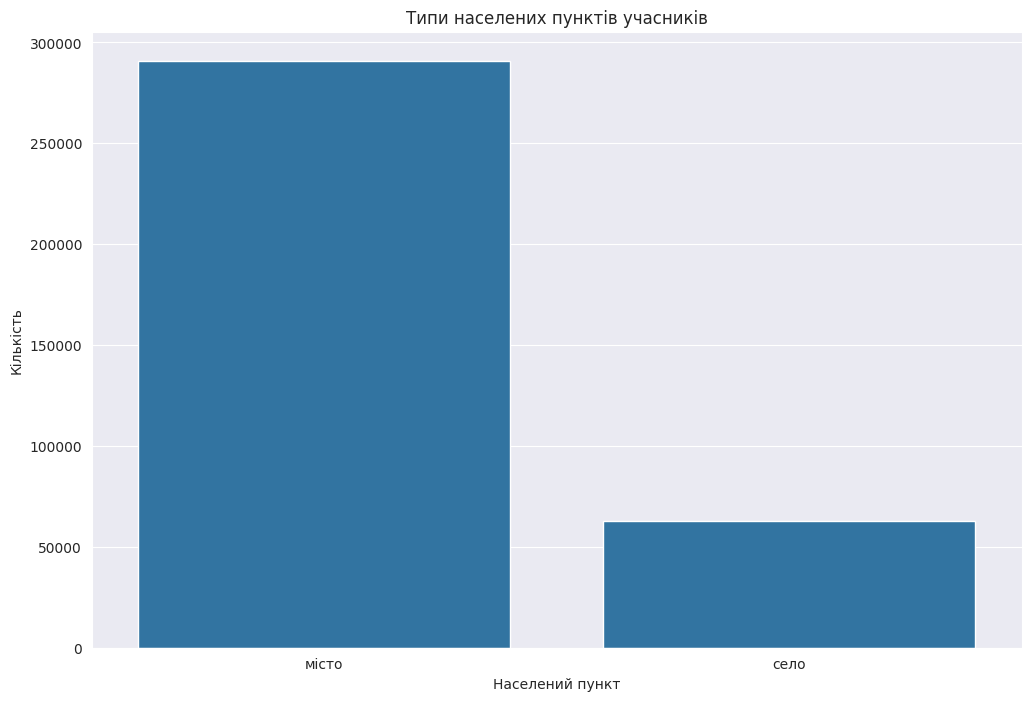

In [24]:
territory_counts = participants['TerTypeName'].value_counts()
axes = subplots(figsize=(12, 8))[1]
barplot(x=territory_counts.index, y=territory_counts.values, ax=axes, color=default_color)
axes.set_xlabel('Населений пункт')
axes.set_ylabel('Кількість')
axes.set_title('Типи населених пунктів учасників');

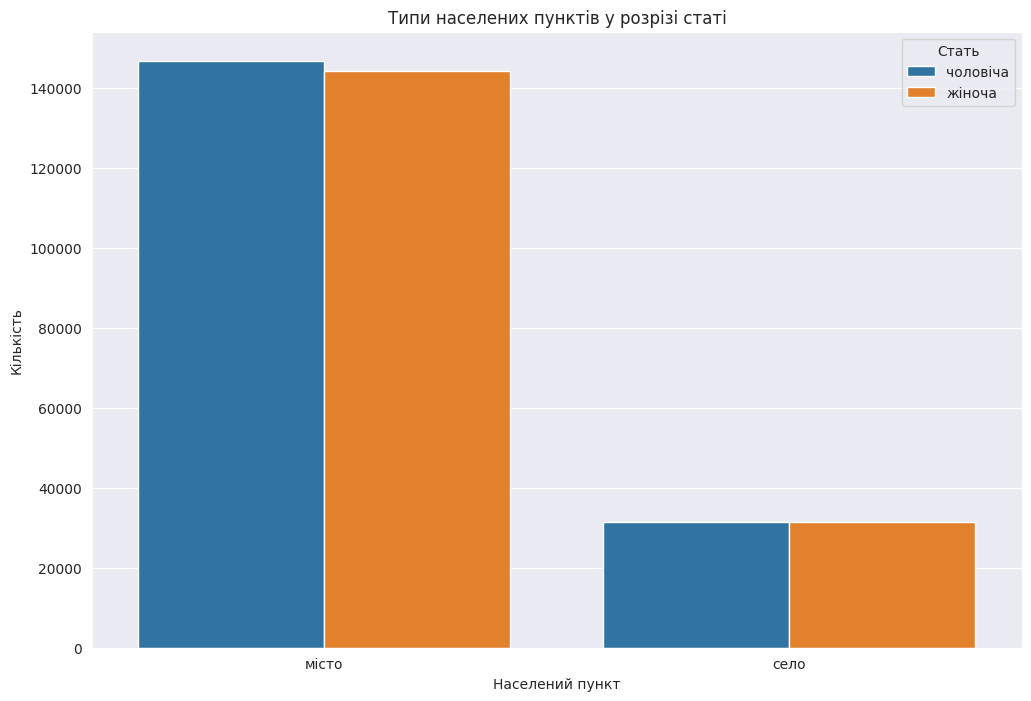

In [25]:
registration_sex_counts = (
    participants
    .groupby(['TerTypeName', 'SEXTYPENAME'])
    .size()
    .sort_values(ascending=False)
)
axes = subplots(figsize=(12, 8))[1]
x = registration_sex_counts.index.get_level_values(0)
y = registration_sex_counts.values
hue = registration_sex_counts.index.get_level_values(1).rename('Стать')
barplot(x=x, y=y, hue=hue, ax=axes, palette=sex_palette)
axes.set_xlabel('Населений пункт')
axes.set_ylabel('Кількість')
axes.set_title('Типи населених пунктів у розрізі статі');

In [26]:
missing_label = 'Не вказано'
missing_color = '#7f7f7f'

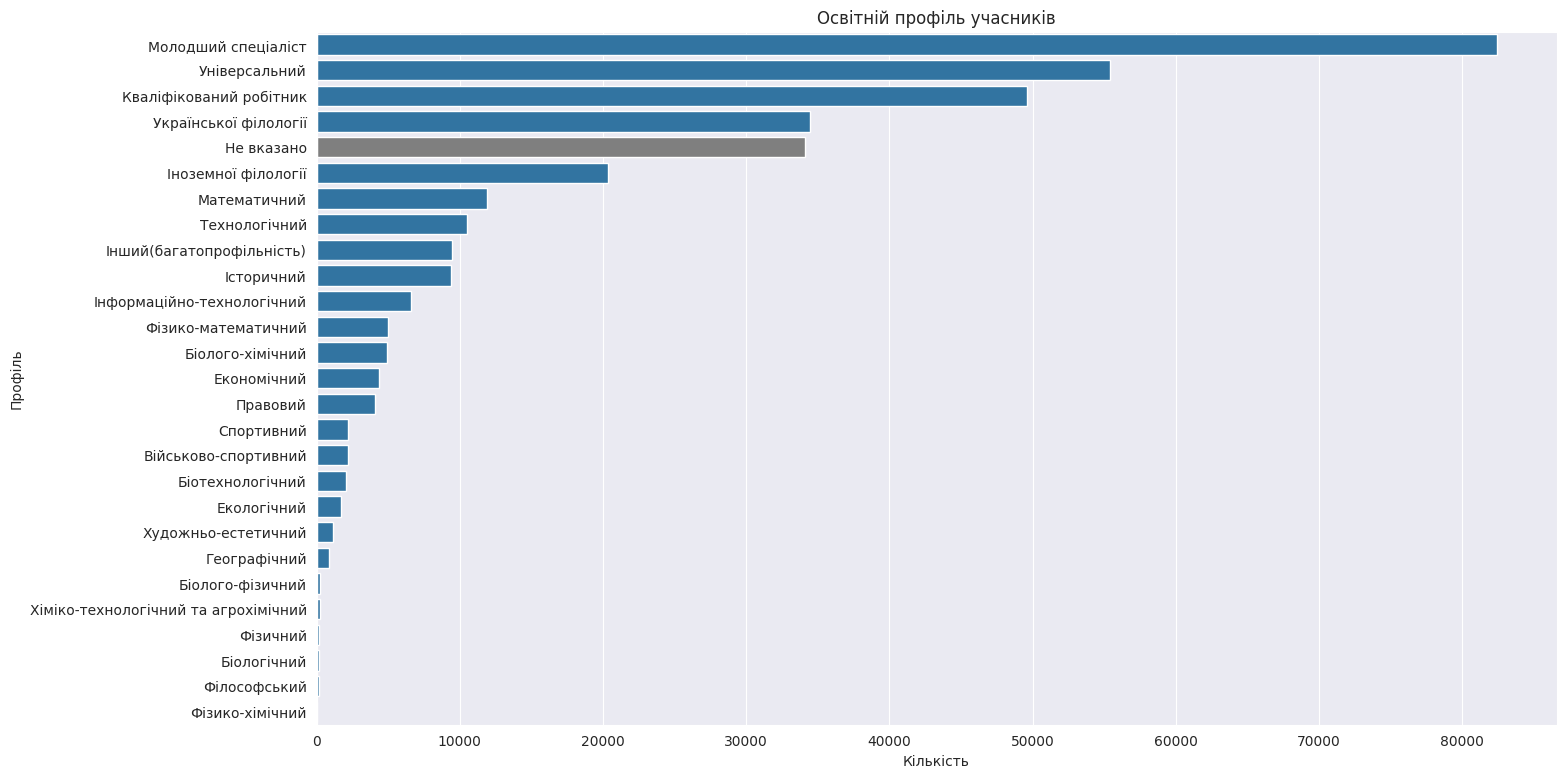

In [27]:
profile_counts = participants['ClassProfileNAME'].replace('', missing_label).value_counts()
axes = subplots(figsize=(16, 9))[1]
palette = where(profile_counts.index == missing_label, missing_color, default_color)
barplot(x=profile_counts.values, y=profile_counts.index, ax=axes, palette=palette)
axes.set_xlabel('Кількість')
axes.set_ylabel('Профіль')
axes.set_title('Освітній профіль учасників');

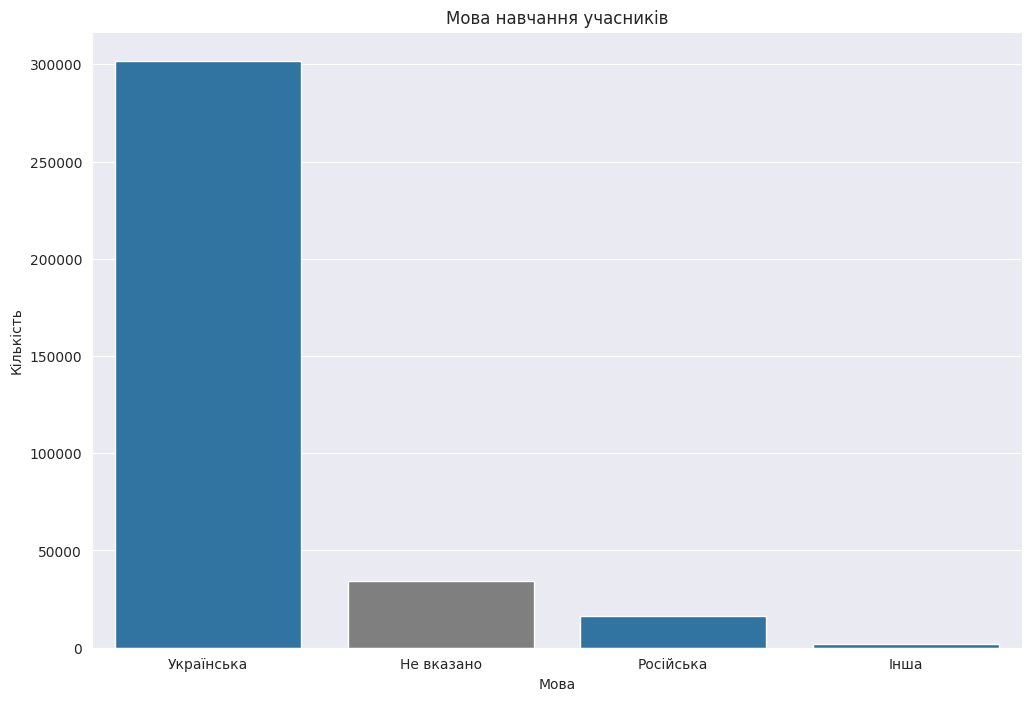

In [28]:
desired_langs = ['українська', '', 'російська']
lang_counts = (
    participants
    ['ClassLangName']
    .where(participants['ClassLangName'].isin(desired_langs), 'інша')
    .str
    .capitalize()
    .replace('', missing_label)
    .value_counts()
)
axes = subplots(figsize=(12, 8))[1]
palette = where(lang_counts.index == missing_label, missing_color, default_color)
barplot(x=lang_counts.index, y=lang_counts.values, ax=axes, palette=palette)
axes.set_xlabel('Мова')
axes.set_ylabel('Кількість')
axes.set_title('Мова навчання учасників');

In [29]:
participants['EONAME'].nunique() - 1

10866

In [30]:
school_counts = participants['EONAME'].value_counts().drop('')

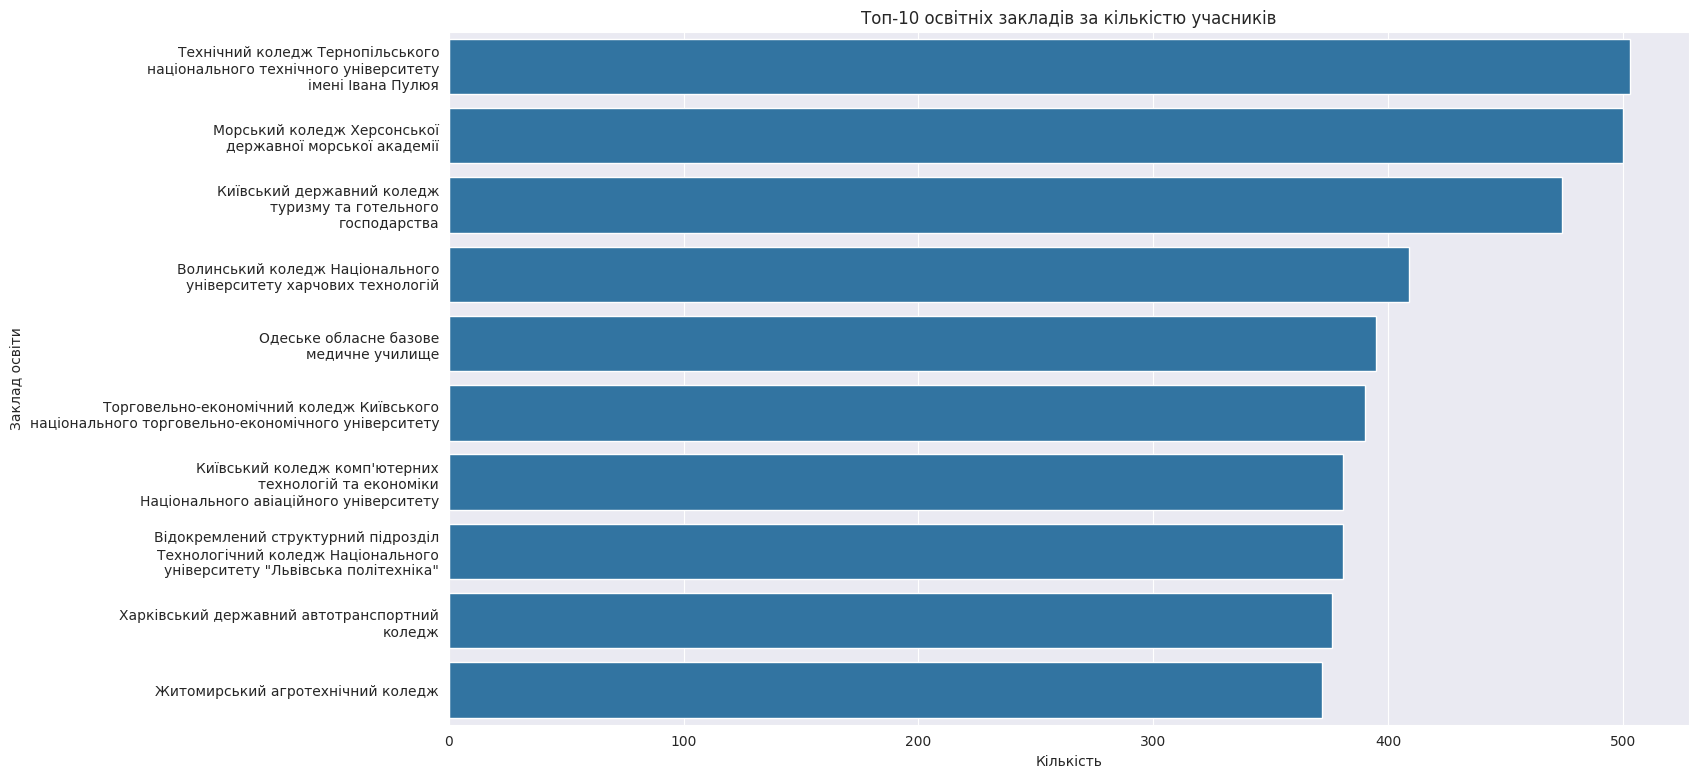

In [31]:
n_schools = 10
top_school_counts = school_counts.nlargest(n_schools)
axes = subplots(figsize=(16, 9))[1]
x = top_school_counts.values
y = top_school_counts.index.map(break_caption)
barplot(x=x, y=y, ax=axes, color=default_color)
axes.set_xlabel('Кількість')
axes.set_ylabel('Заклад освіти')
axes.set_title(f'Топ-{n_schools} освітніх закладів за кількістю учасників');

In [35]:
from numpy import percentile

In [38]:
percentile(school_counts.values, 75)

33.0

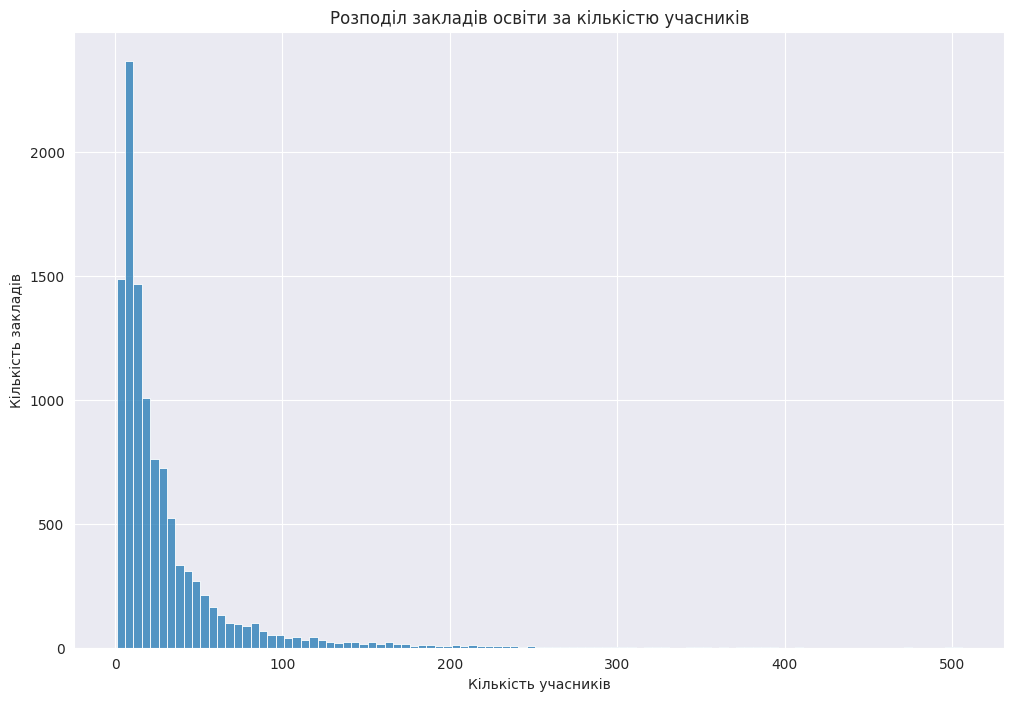

In [40]:
axes = subplots(figsize=(12, 8))[1]
histplot(x=school_counts.values, ax=axes, color=default_color, binwidth=5)
axes.set_xlabel('Кількість учасників')
axes.set_ylabel('Кількість закладів')
axes.set_title('Розподіл закладів освіти за кількістю учасників');

In [42]:
subjects = ['Ukr', 'hist', 'math', 'phys', 'chem', 'bio', 'geo', 'eng', 'fra', 'deu', 'spa']

In [58]:
outid_column = 'OUTID'
mandatory_columns = [
    'Test',
    'TestStatus',
    'Ball100',
    'Ball12',
    'Ball',
    'PTName',
    'PTRegName',
    'PTAreaName',
    'PTTerName'
]
scale_column = 'AdaptScale'
dpa_column = 'DPALevel'

In [65]:
partitions = []
for subject in subjects:
    result_columns = [outid_column] + [subject + c for c in mandatory_columns]
    partition = ife[result_columns].copy()
    subject_scale_column = subject + scale_column
    if subject_scale_column in ife.columns:
        partition[subject_scale_column] = ife[subject_scale_column]
    else:
        partition[subject_scale_column] = 0
    subject_dpa_column = subject + dpa_column
    if subject_dpa_column in ife.columns:
        partition[subject_dpa_column] = ife[subject_dpa_column]
    else:
        partition[subject_dpa_column] = ''
    partition.columns = partition.columns.str.lstrip(subject)
    partition.dropna(subset=mandatory_columns[0], inplace=True)
    partitions.append(partition)
results = concat(partitions, ignore_index=True)

In [66]:
results.info(verbose=True, show_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041699 entries, 0 to 1041698
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   OUTID       1041699 non-null  object 
 1   Test        1041699 non-null  object 
 2   TestStatus  1041699 non-null  object 
 3   Ball100     996168 non-null   object 
 4   Ball12      801934 non-null   float64
 5   Ball        996168 non-null   float64
 6   PTName      1041699 non-null  object 
 7   PTRegName   1041699 non-null  object 
 8   PTAreaName  1041699 non-null  object 
 9   PTTerName   1041699 non-null  object 
 10  AdaptScale  1041699 non-null  int64  
 11  DPALevel    999967 non-null   object 
dtypes: float64(2), int64(1), object(9)
memory usage: 95.4+ MB


In [67]:
results.head(10)

,OUTID,Test,TestStatus,Ball100,Ball12,Ball,PTName,PTRegName,PTAreaName,PTTerName,AdaptScale,DPALevel
0,07ad4c55-70ef-442d-bb7f-34c95c0e6ee4,Українська мова і література,Зараховано,"100,0",4.0,23.0,"Комунальний заклад ""Василівська гімназія ""Сузі...",Запорізька область,Василівський район,м.Василівка,0,
1,8626c448-3a7d-434f-b01a-c2530ccf3a4f,Українська мова і література,Не з’явився,NaN,NaN,NaN,Заклад загальної середньо освіти І-ІІІ ступені...,Донецька область,м.Торецьк,м.Торецьк,0,
2,9709b00b-144c-4487-b7bc-66c0b353b324,Українська мова і література,Зараховано,"166,0",10.0,68.0,Тернопільська загальноосвітня школа І-ІІІ ступ...,Тернопільська область,м.Тернопіль,м.Тернопіль,0,
3,5617254e-aee4-4fa6-81cc-f0159cc972bc,Українська мова і література,Зараховано,"127,0",6.0,38.0,Вараська загальноосвітня школа І-ІІІ ступенів ...,Рівненська область,м.Вараш,м.Вараш,0,
4,2e8b9de3-8806-415a-bad1-be822ef8a042,Українська мова і література,Зараховано,"171,0",9.0,72.0,Новоукраїнська загальноосвітня школа І-ІІІ сту...,Кіровоградська область,Новоукраїнський район,м.Новоукраїнка,0,
5,68a81d38-42e6-40fd-a145-9fb6ed2565ea,Українська мова і література,Не подолав поріг,"0,0",2.0,6.0,Свалявська загальноосвітня школа І-ІІІ ступені...,Закарпатська область,Свалявський район,м.Свалява,0,
6,d29508d2-7fc3-4462-b5e8-e82e7ac3d3b5,Українська мова і література,Не подолав поріг,"0,0",2.0,17.0,Спеціалізована школа №7 імені М.Т.Рильського м...,м.Київ,м.Київ. Солом'янський район міста,Солом'янський район міста,0,
7,eb149a7d-984e-4295-807c-12538b83b2d5,Українська мова і література,Зараховано,"157,0",8.0,60.0,Волноваська загальноосвітня школа I-III ступен...,Донецька область,Волноваський район,м.Волноваха,0,
8,da969cfc-c91c-4a52-885f-21117e6e07f0,Українська мова і література,Зараховано,"100,0",4.0,23.0,Середня загальносвітня школа І-ІІІ ступенів № 62,м.Київ,м.Київ. Дарницький район міста,Дарницький район міста,0,
9,46a12d3d-00d5-4d22-aea1-c2a2adf3d1d4,Українська мова і література,Зараховано,"189,0",11.0,90.0,Дунаєвецька загальноосвітня школа I-III ступен...,Хмельницька область,Дунаєвецький район,м.Дунаївці,0,


In [78]:
results['Ball100'] = results['Ball100'].fillna('0').str.replace(',', '.').astype(float)

In [79]:
results['Ball12'] = results['Ball12'].fillna(0)

In [80]:
results['Ball'] = results['Ball'].fillna(0)

In [81]:
results['DPALevel'] = results['DPALevel'].fillna('')

In [82]:
results.info(verbose=True, show_counts=True, memory_usage=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1041699 entries, 0 to 1041698
Data columns (total 12 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   OUTID       1041699 non-null  object 
 1   Test        1041699 non-null  object 
 2   TestStatus  1041699 non-null  object 
 3   Ball100     1041699 non-null  float64
 4   Ball12      1041699 non-null  float64
 5   Ball        1041699 non-null  float64
 6   PTName      1041699 non-null  object 
 7   PTRegName   1041699 non-null  object 
 8   PTAreaName  1041699 non-null  object 
 9   PTTerName   1041699 non-null  object 
 10  AdaptScale  1041699 non-null  int64  
 11  DPALevel    1041699 non-null  object 
dtypes: float64(3), int64(1), object(8)
memory usage: 95.4+ MB


In [87]:
results[['Test', 'OUTID']].join(participants['SEXTYPENAME'], 'OUTID')

,Test,OUTID,SEXTYPENAME
0,Українська мова і література,07ad4c55-70ef-442d-bb7f-34c95c0e6ee4,жіноча
1,Українська мова і література,8626c448-3a7d-434f-b01a-c2530ccf3a4f,жіноча
2,Українська мова і література,9709b00b-144c-4487-b7bc-66c0b353b324,жіноча
3,Українська мова і література,5617254e-aee4-4fa6-81cc-f0159cc972bc,чоловіча
4,Українська мова і література,2e8b9de3-8806-415a-bad1-be822ef8a042,жіноча
...,...,...,...
1041694,Іспанська мова,0721bb40-d38c-47ff-9b95-05b33e2fd8fb,чоловіча
1041695,Іспанська мова,fc3508f6-5688-44ad-ac52-66368beeadc6,жіноча
1041696,Іспанська мова,d3360fa9-04fb-497c-821c-f3e212af11c2,чоловіча
1041697,Іспанська мова,28fc9f0a-73c9-4a7f-8017-397bcbb5266a,чоловіча


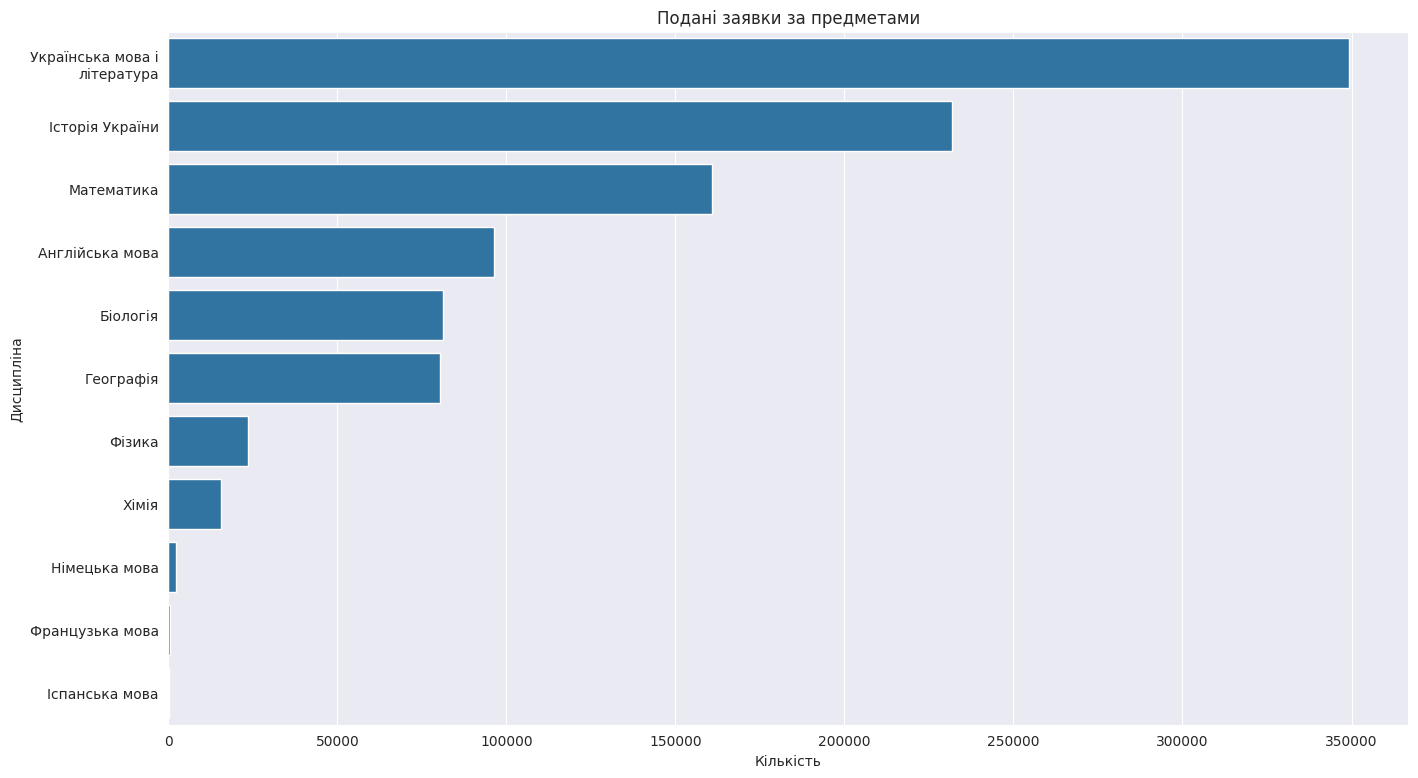

In [83]:
test_counts = results['Test'].value_counts()
axes = subplots(figsize=(16, 9))[1]
x = test_counts.values
y = test_counts.index.map(break_caption)
barplot(x=x, y=y, ax=axes, color=default_color)
axes.set_xlabel('Кількість')
axes.set_ylabel('Дисципліна')
axes.set_title('Подані заявки за предметами');

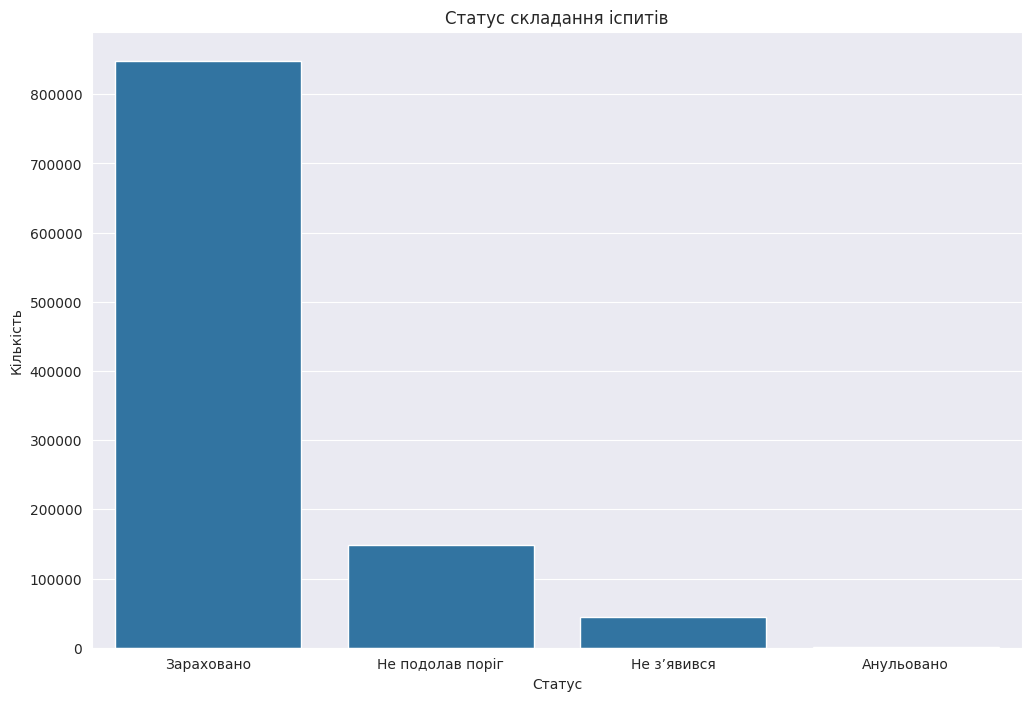

In [88]:
status_counts = results['TestStatus'].value_counts()
axes = subplots(figsize=(12, 8))[1]
x = status_counts.index
y = status_counts.values
barplot(x=x, y=y, ax=axes, color=default_color)
axes.set_xlabel('Статус')
axes.set_ylabel('Кількість')
axes.set_title('Статус складання іспитів');

In [98]:
status_colors = {
    'Зараховано': '#1f77b4',
    'Не подолав поріг': '#ff7f0e',
    'Анульовано': '#d62728',
    'Не з’явився': '#7f7f7f'
}

In [100]:
subject_status_shares = (
    results
    .groupby(['Test', 'TestStatus'], as_index=False)
    .size()
    .pivot(index='Test', columns='TestStatus', values='size')
    .fillna(0)
)
subject_status_shares = subject_status_shares[list(status_colors.keys())]
subject_status_shares.div(subject_status_shares.sum(1), 0)

TestStatus,Зараховано,Не подолав поріг,Анульовано,Не з’явився
Test,,,,
Іспанська мова,0.625000,0.125000,0.000000,0.250000
Історія України,0.804147,0.155277,0.000380,0.040197
Англійська мова,0.825394,0.119693,0.002817,0.052096
Біологія,0.852133,0.083026,0.000172,0.064669
Географія,0.836899,0.097308,0.000137,0.065656
Математика,0.790468,0.174827,0.000728,0.033978
Німецька мова,0.707763,0.183105,0.000000,0.109132
Українська мова і література,0.819810,0.150115,0.001508,0.028566
Французька мова,0.787338,0.110390,0.000000,0.102273
